# Principal component Analysis

Because it difficult to visualize high dimentional data, we can use PCA to find the first two principal components.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
#Read the data
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
df.head()

,SUBJECTN,CLIN,SEX,V1,V2,V3,V4,V5,V6,V7,...,33.0-DseqL,34.0-DseqL,35.0-DseqL,36.0-DseqL,37.0-DseqL,5.0-DseqL,6.0-DseqL,7.0-DseqL,8.0-DseqL,9.0-DseqL
0,BC_10,Healthy,NaN,0.232505,0.025345,0.431113,0.243586,0.058649,0.008521,0.000281,...,0.000076,0.000127,0.000025,0.000025,0.000000,0.049911,0.067015,0.057405,0.051976,0.051160
1,BC_11,Healthy,NaN,0.213667,0.026993,0.466993,0.238861,0.044784,0.008565,0.000137,...,0.000096,0.000019,0.000058,0.000039,0.000000,0.048053,0.061529,0.054425,0.050902,0.050729
2,BC_12,Healthy,NaN,0.208928,0.025766,0.401013,0.307753,0.032451,0.010218,0.013870,...,0.000000,0.000224,0.000000,0.000000,0.000000,0.050220,0.065361,0.056734,0.051886,0.050319
3,BC_13,Healthy,NaN,0.208727,0.048319,0.402105,0.284245,0.049473,0.006873,0.000258,...,0.000247,0.000073,0.000058,0.000029,0.000015,0.049292,0.058772,0.051546,0.047576,0.047881
4,BC_14,Healthy,NaN,0.248387,0.022468,0.449467,0.224517,0.047101,0.007833,0.000227,...,0.000302,0.000267,0.000107,0.000036,0.000089,0.045476,0.053533,0.045690,0.045299,0.047415


In [125]:
df_target_names = df.CLIN.unique()
df_target_names

array(['Healthy', 'Celiac'], dtype=object)

In [126]:
df_target = pd.factorize(df['CLIN'])[0]
df_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

We can use tSNE and PCA methods to find the first two principal components.

Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

# TSNE : t-Stochastic Neighbor Embedding 

In [53]:
import numpy as np
from sklearn.neighbors import BallTree
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
import urllib.request as ur
from gzip import GzipFile
import pandas as pd

Unfortunately, there is not a useful conclusion from the tSNE graph


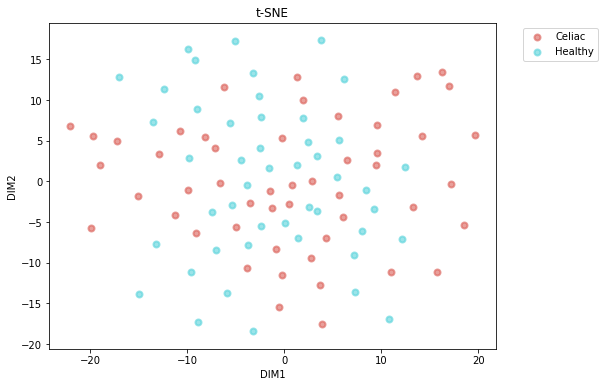

In [147]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

# First, scale our data so that each feature has a single unit variance
   # scaler = StandardScaler()
    #scaler.fit(df.iloc[:,3:])
    #scaled_data = scaler.transform(df.iloc[:,3:])
from sklearn.preprocessing import scale
scaled_data = scale(df.iloc[:,3:])
    
# cellLabels = target_name (H / C)
cellLabels = df.iloc[:,1]
Counter(cellLabels)
target_name = df.CLIN.unique()

# load and perform tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_r = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", list(set(cellLabels)).__len__())
lw = 2
for color,  target_name in zip(colors, list(set(cellLabels))):
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.6, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('DIM1')
plt.ylabel('DIM2')
plt.title('t-SNE');

print('Unfortunately, there is not a useful conclusion from the tSNE graph')

# PCA: Principal component Analysis


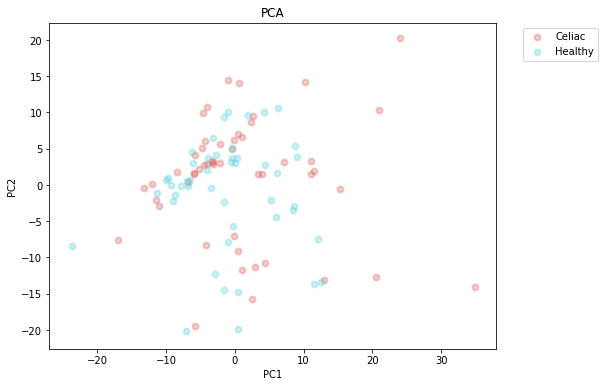

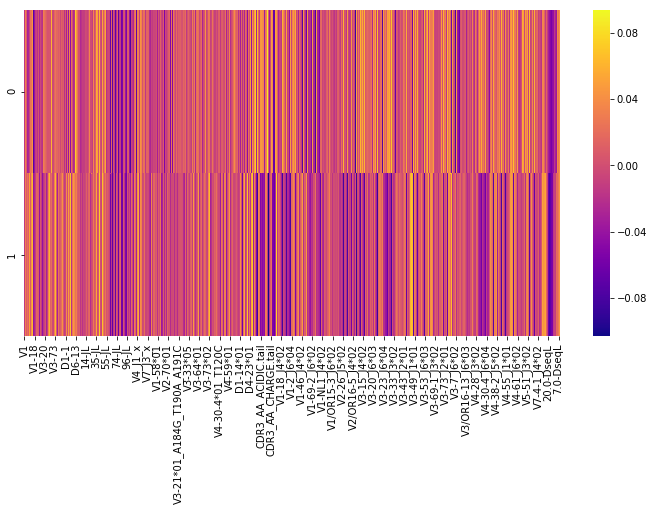

In [144]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

# First, scale our data so that each feature has a single unit variance
   # scaler = StandardScaler()
    #scaler.fit(df.iloc[:,3:])
    #scaled_data = scaler.transform(df.iloc[:,3:])
from sklearn.preprocessing import scale
scaled_data = scale(df.iloc[:,3:])
    
# cellLabels = target_name (H / C)
cellLabels = df.iloc[:,1]
Counter(cellLabels)
target_name = df.CLIN.unique()

#%% PCA:
pca = PCA(n_components=2)
#Now we can transform this data to its first 2 principal components.
X_r = pca.fit_transform(scaled_data )

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", list(set(cellLabels)).__len__())
lw = 2
for color,  target_name in zip(colors, list(set(cellLabels))):
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA');

# Heat map
df_columns = df.columns
df_columns = list(df_columns)
df_comp = pd.DataFrame(pca.components_,columns=df_columns[3:])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself. Unfortunately, this information is not useful for us when dealing with the different between healy and celiac cohort.

# PCA for men VS women 

Counter({'F': 46, 'M': 18})


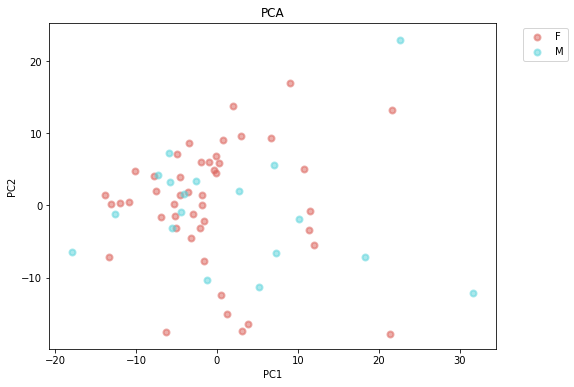

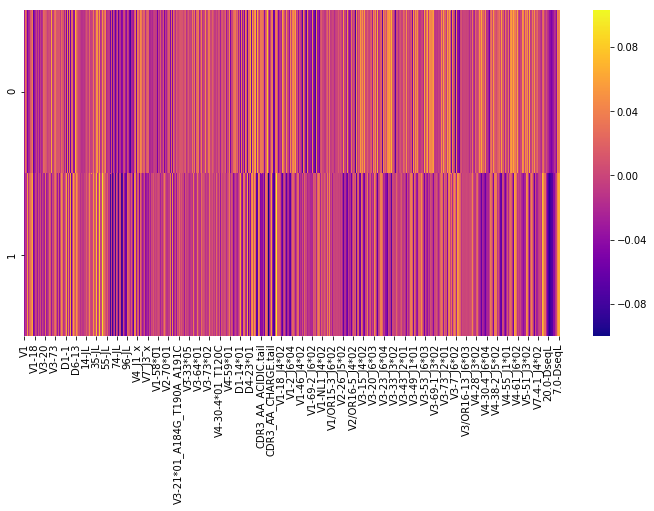

In [152]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
df = df.dropna(subset=['SEX'])
print ( Counter(df.loc[:,'SEX']))


from sklearn.preprocessing import scale
scaled_data = scale(df.iloc[:,3:])
    
# cellLabels = target_name (F / M)
cellLabels = df.loc[:,'SEX']
Counter(cellLabels)
target_name = df.SEX.unique()

#%% PCA:
pca = PCA(n_components=2)
#Now we can transform this data to its first 2 principal components.
X_r = pca.fit_transform(scaled_data )

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", list(set(cellLabels)).__len__())
lw = 2
for color,  target_name in zip(colors, list(set(cellLabels))):
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.5, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA');

# Heat map
df_columns = df.columns
df_columns = list(df_columns)
df_comp = pd.DataFrame(pca.components_,columns=df_columns[3:])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# tSNE female VS male

Counter({'F': 46, 'M': 18})
Unfortunately, there is not a useful conclusion from the tSNE graph


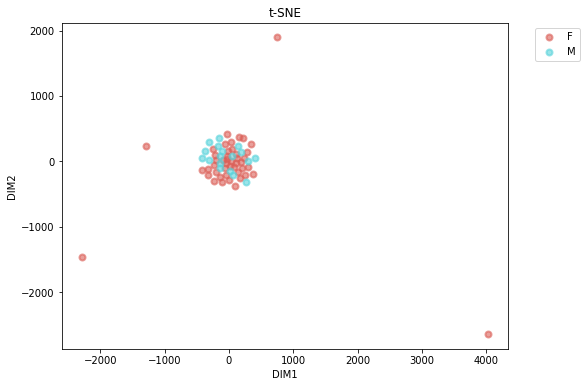

In [153]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
# drop raws with unknown sex label
df = df.dropna(subset=['SEX'])
print ( Counter(df.loc[:,'SEX']))

from sklearn.preprocessing import scale
scaled_data = scale(df.iloc[:,3:])
    
# cellLabels = target_name (F / M)
cellLabels = df.loc[:,'SEX']
Counter(cellLabels)
target_name = df.SEX.unique()

# load and perform tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_r = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", list(set(cellLabels)).__len__())
lw = 2
for color,  target_name in zip(colors, list(set(cellLabels))):
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.6, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('DIM1')
plt.ylabel('DIM2')
plt.title('t-SNE');

print('Unfortunately, there is not a useful conclusion from the tSNE graph')